# Ocean Recharge Oscillator
## A reduced coupled model for ENSO illustrating the effects of nonlinearity and forcing, based on the model of Fei-Fei Jin (1997)
Laura Mansfield 

Student Number: tj023826

In [1]:
from IPython.core.display import HTML
def css_styling():
    styles = open("custom.css", "r").read()
    return HTML(styles)

css_styling()

A model for the El Nino Southern Oscillation (ENSO) introduced by Jin 1997 CITE is studied using a Runge-Kutta 4th order method. The model consists of a positive feedback and a recharge mechanism, creating an oscillation between the La Nina and El Nino phases. Firstly, a zonal sea surface temperature (SST) gradient from East to West drives easterly winds, which increases wind stress and enhances the SST gradient. This is called the Bjerknes positive feedback CITE JIN. Then there is a larger heat content and higher sea level over the western Pacific, creating a reservoir of warm water. This is the cold La Nina phase. The reservoir of warm water is re-distributed and warm water moves over to the East. This is the recharging mechanism suggested by Cane and Zebiak and Wyrtki, causing the system to transition out of the cold phase. This causes a reduced SST gradient and reduced wind stress, triggering the Bjerknes positive feedback. This is the warm El Nino phase. This phase leaves the ocean with a lower heat content and shallower thermocline and the process repeats. CITE JIN

The prognostic variables are are the thermocline depth anomaly in the Western Pacific, $h$, and the sea surface temperature (SST) anomaly in the Eastern Pacific, $T$. The time evolution (t) of $T$ and $h$ is:

$$ \frac{dT}{dt} = RT + \gamma h - \epsilon (h+bT)^{3} + \gamma \xi   $$     
$$ \frac{dh}{dt} = -rh -\alpha bT - \alpha \xi      $$

where $b=b_{0}\mu$ is the coupling parameter between thermocline gradient and easterly wind stress. $b_{0}=2.5$ is used throughout CITE VIDALE and $\mu$, the coupling coefficient, is varied between 0 and 1.5 CITE JIN. $\gamma$ is the feedback of the thermocline gradient on the SST gradient. $R=\gamma b-c$ describes the overall Bjerknes positive feedback of the ocean-atmospheric interaction including the damping rate of SST anomalies, $c$. $r$ is the damping of the upper ocean heat content and $\alpha$ represents the recharge of the ocean heat content as described in Jin 1997aCITE. Finally, $\epsilon$ represents the degree of non-linearity and $\xi$ is an external wind stress forcing. CITE VIDALE

The equations are non-dimensionalised with the scales [T]=7.5 K, [h]=150 m, [t]=2 months.

## Choice of Numerical Method

To simulate the system accurately, the numerical method and analytic system should share stability properties. The system is simplified in the absence of non-linearity and wind stress. Equations 1 and 2 in matrix form are then :
 $$ \frac{d}{dt} \begin{pmatrix} T \\ h \end{pmatrix} = \begin{pmatrix} R & \gamma \\  -\alpha b & -r \end{pmatrix} \begin{pmatrix} T \\ h \end{pmatrix} $$

The matrix can be diagonalised into a new matrix, from which its eigenvalues, $\lambda _j + i\omega_j$, can be calculated where $\lambda_j$ are the real components and $\omega_j$ are the imaginary components. This gives decoupled equations in new variables with eigenvectors proportional to $e^{\lambda _j t}e^{i \omega_j t}$. Hence, for timestep $\Delta t$, the phase of the solution is changed by $\omega_j \Delta t$ and the amplitude by $\lambda_j \Delta t$. For a decaying system, $\lambda_j<0$, a growing system $\lambda_j>0$ and for a system of constant amplitude $\lambda_j=0$. The real part of the eigenvalues, governing the the stability of the system can be seen in figure 2 of JIN 1997a. $\lambda_j=0$ and hence the system is stable, when $\mu=\mu_{crit}=\frac{2}{3}$. For $\mu$ greater than this the system is growing and for $\mu$ lower than this the system is decaying.

### Numerical Stability 
For a numerical method, the amplification factor, $A$ is defined as <cite data-cite="durran">(durran, year)</cite>:

$$ q^{n+1} = A q^{n} $$

<cite data-cite="durran">(Durran,year???)</cite>
for the variable of study $q$. Hence $q$ grows with time if $|A|>1$, decays with time if $|A|<1$ or is neutrally stable if $|A|=1$. A suitable numerical scheme should have the same stability properties as the system, governed by $\lambda_j$. Then, the scheme should be neutrally stable when $\mu = \frac{2}{3}$, amplifying when $\mu>\frac{2}{3}$ and decaying when $\mu<\frac{2}{3}$.

The method chosen was Runga-Kutta 4th Order (RK4) based on <cite data-cite="something">(SOME CITATION, year)</cite>
This scheme is known to accurately represent oscillations, growth and decay. **FIND ** For variable $q$ and time evolution $\frac{dq}{dt}=f(q,t)$, the RK4 method is written:

$$q^{n+1} = q^{n} + \Delta t \frac{1}{6}(k_1+2k_2+2k_3+k_4) $$

with $k_1=f(q^{n},n\Delta t)$, $k_2=f(q^{n}+\frac{k_1\Delta t}{2}, (n+\frac{1}{2})\Delta t)$, $k_3=f(q^{n}+\frac{k_2\Delta t}{2},(n+\frac{1}{2})\Delta t)$ and $k_4=f(q^{n}+k_3\Delta t,(n+1)\Delta t)$. Here, $q$ is taken to be the vector $q=\begin{pmatrix}T\\h\end{pmatrix}$ with $f(q,t)$ equal to the right-hand side of equations 1 and 2 in vector form. These equations are solved with a timestep of 1 day throughout.



## Task A

The model is first tested in the absence of non-linearity ($\epsilon = 0$) and wind-stress forcing ($\xi=0$). The initial conditions are an SST anomaly in the Eastern Pacific of 1.125K \cite{vidale}. This corresponds to non-dimensionalised $T=0.15$. The thermocline anomaly is kept at 0m. $\mu = \frac{2}{3}$ is tested for one period of oscillation below.


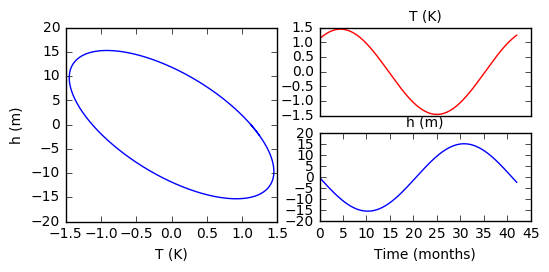

In [2]:
from parameters import *   # Imports all fixed parameters
from plot import *
from schemes import *

T,h = rk4(T0=0.15, h0=0., mu0=2./3., n_cycles=1)
time_and_phase(T,h)


<div class='cap'> Figure 1 (a) phase diagram and (b) time series for Eastern Pacific SST anomaly ($T$) and Western Pacific thermocline depth ($h$) with parameters $\mu=\frac{2}{3}$, $\epsilon = 0$ and $\xi = 0$ and initial conditions $T_{0}=1.125$ K, $h_{0}=0$ m. 
</div>



The phase diagram shows an elliptical orbit suggesting that there is lag between changes in SST anomaly and in thermocline depth anomaly.

As described above, analytically the equations should give rise to stable oscillations when $\mu=\frac{2}{3}$. Figure 1 shows an oscillation in phase-space, the trajectory makes a complete cycle and returns to the same point. Therefore it will continue this indefinitely. This can be checked by increasing the number of timesteps (e.g. to 100 cycles). Since the trajectory does not change over long periods, it can be assumed that the  RK4 method is stable in this case. This could be shown more robustly by calculating the eigenvalues for which is the scheme is stable CITE PIERLUIGI


## Task B


The effect of varying the coupling between the ocean and atmosphere is investigated by changing the coupling coefficient $\mu$.
For $\mu<\mu_{crit}$, the oscillations are damped out, shown in figure 2 below, where $\mu=0.5$. This is the subcritical oscillatory regime <cite data-cite="Jin1997a">(Jin, 1997a)</cite>. Note that if $\mu$ is decreased significantly further, the decay is so fast that no oscillations are seen. This occurs when $\mu<(8+\sqrt{28})/15$ (the strongly decoupled regime). In both cases, $|A|<1$ for the RK4 method and the phase diagram shows the trajectory spiral in towards the stable state or attractor: $h=0$, $T=0$. This agrees with the negative growth rate seen for the analytic system with $\mu<\mu_{crit}$ in figure 2 of Jin 1997a CITE. This can be explained because equation 2 is dominated by the decay term, $-rh$.

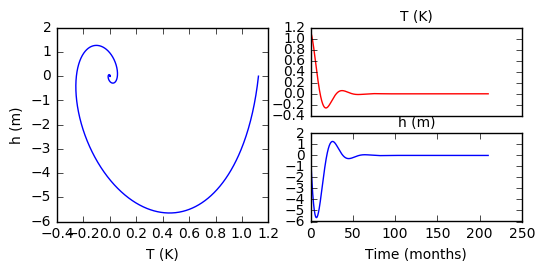

In [3]:
T,h = rk4(T0=0.15, h0=0., mu0=0.5, n_cycles=5)
time_and_phase(T,h)

<div class='cap'> Figure 2 (a) phase diagram and (b) time series for Eastern Pacific SST anomaly ($T$) and Western Pacific thermocline depth ($h$) with parameters $\mu=0.5$, $\epsilon = 0$ and $\xi = 0$ and initial conditions $T_{0}=1.125$ K, $h_{0}=0$ m. 
</div>

The RK4 method for the recharge oscillator is then tested with $\mu>\frac{2}{3}$, the supercritical regime <cite data-cite="Jin1997a">(Jin, 1997a)</cite>. In figure 3 below, $\mu=0.75$. Here the RK4 method shows an amplification in amplitude of oscillations, i.e. $|A|>1$. This is in agreement with the positive growth rate in the analytic system in this regime, shown in figure 2 of Jin 1997a CITE. 

$\mu$ can be increased so that the growth is too fast for oscillations to form. The growth can be positive or negative depending on the sign of the initial SST anomaly. i.e. if $T_0>0$, $T$ grows to infinite positive values and if $T_0>0$ grows to infinite negative values. This agrees with theory where the growing mode is due to the Bjerknes feedback growth rate being too fast to be limited by the slow ocean processes. These modes should occur when $\mu>(8+\sqrt{28})/15=0.886$  CITE JIN 1997a and this is found to be true for the RK4 method also.


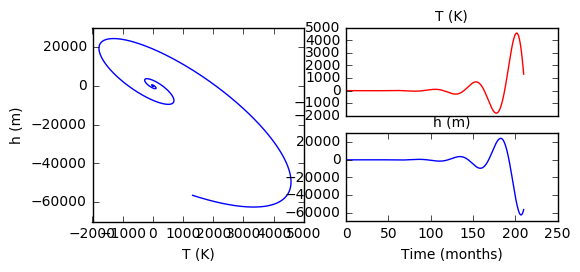

In [5]:
T,h = rk4(T0=0.15, h0=0., mu0=0.75, n_cycles=5)
time_and_phase(T,h)

<div class='cap'> Figure 3 (a) phase diagram and (b) time series for Eastern Pacific SST anomaly ($T$) and Western Pacific thermocline depth ($h$) with parameters $\mu=0.75$, $\epsilon = 0$ and $\xi = 0$ and initial conditions $T_{0}=1.125$ K, $h_{0}=0$ m. 
</div>


# Task C

Non-linearity is turned on by setting $\epsilon=0.1$ in the following experiments. This is tested for $\mu=\mu_{crit}$ in figure 4 below. The non-linear term adds a damping to the system, which can be seen in the decreasing amplitude in $T$ and $h$ and hence the spiralling trajectory in the phase diagram. **WHAT DOES THIS REPRESENT**
For a smaller perturbation of temperature, the damping of oscillations is weaker. Hence, damping slows with time as the SST becomes smaller. The system reaches a stable oscillatory state with an amplitude dependant on **???**  

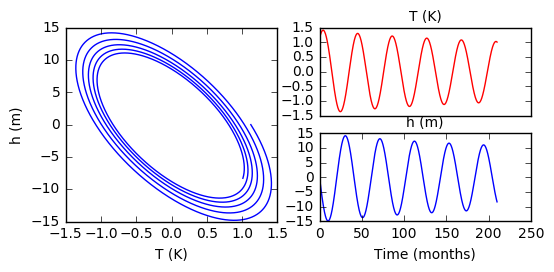

In [29]:
T,h=rk4(T0=0.15, h0=0., mu0=2./3., n_cycles=5, epsilon=0.1)
time_and_phase(T,h)


Increasing $\mu$ to 0.75 no longer shows the growing amplitude of oscillations, in figure ? below. This is in agreement with Jin who showed that the amplitude of the growth should be limited by non-linear terms in equations <cite data-cite="Jin1997a">(Jin, 1997a)</cite>. Once this state is reached, the amplitude remains constant.

By changing $T_0$ it can be shown that the amplitude of oscillations does not depend on the initial conditions. Instead, it can be shown to depend on $\mu$. Jin 1997a finds the amplitude to also depend on $b_0$, $\gamma$ and $\epsilon$. This is known as 'self-excitation' of the recharge oscillator <cite data-cite="Jin1997a">(Jin, 1997a)</cite>. 


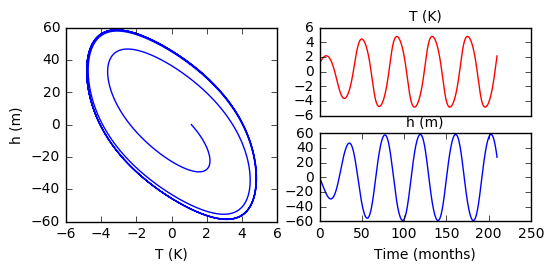

In [35]:
T,h=rk4(T0=0.15, h0=0., mu0=0.75, n_cycles=5, epsilon=0.1)
time_and_phase(T,h)


For $\mu$ close to $\frac{2}{3}$ the phase diagram shows an ellipse close to the simple harmonic oscillator seen in figure ?. However, for larger $\mu$, the phase diagrams are more distorted with longer periods between each phase. This may be because the non-linear term is greater for increased $b$ and hence $\mu$.**WHY**
For $\mu>\frac{19}{15}$, the oscillation vanishes and the state moves to a constant $T$ and $h$, with the same sign as the initial conditions but a stronger magnitude. This is a bifurcation into a permanent El Nino or La Nina state. However, this situation is not important since it is not realistic for $\mu$ to become so large. CITE JIN

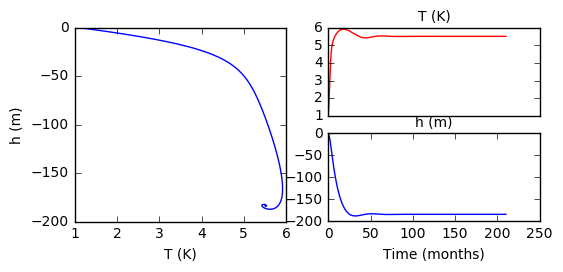

In [9]:
T,h=rk4(T0=0.15, h0=0., mu0=20./15, n_cycles=5, epsilon=0.1)
time_and_phase(T,h)

However, it is noted that even with the non-linear term included, decreasing $\mu$ to 0.5 gives similar to results to figure ?, where the oscillations are quickly damped out. Jin shows that the oscillations can be excited by a stochastic forcing by adding in wind stress and heat flux forcings <cite data-cite="Jin1997a">(Jin, 1997a)</cite>. The addition of wind stress, $\xi$ in equation ? is considered in section ???. 

# Task D
include annual frequency for mu
set mu_ann=0.2

$$\mu = \mu_{0} \Big( 1 + \mu_{ann} \cos \Big( \frac{ 2 \pi t }{\tau} - \frac{5 \pi}{6}\Big) \Big)$$

where $\tau=12$ months is the period of oscillation and $\frac{5\pi}{6}$ is the phase so that the maximum occurs in May due to the location of the ITCZ CITE https://www.seas.harvard.edu/climate/eli/reprints/Eccles-Tziperman-2004.pdf Here, $\mu_{0}$ is set to 0.75 so that $\mu$ varies between 0.6 and 0.9 over the year. This oscillation interferes with the oscillation in $T$ and $h$ by increasing the amplitude of some peaks and decreasing the amplitude of others in figure ?. This distorts the elliptical trajectory by adding smaller oscillations near the maxima in $T$ and $h$. This is where the system switches from the El Nino to La Nina phase or vice versa. The trajectory is not altered much when in between phases (when parallel to the major axis of the ellipse). By increasing $\mu_{ann}$ further (e.g. when $\mu_{ann}=1$), it becomes clear that this term is also speeding up oscillations so they are more in phase with the annual cycle.

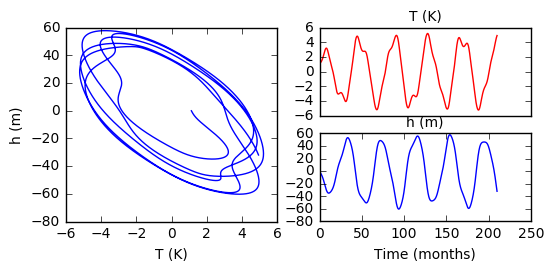

In [10]:
T,h=rk4(T0=0.15, h0=0., mu0=0.75, n_cycles=5, epsilon=0.1, mu_ann=0.2)
time_and_phase(T,h)


# Task E
For $\mu<\frac{2}{3}$, perturbations in SST and thermocline depth were quickly damped out (figure ? ). The addition of wind stress forcing terms $\gamma \xi$ and $-\alpha \xi$ maintain the oscillation in $T$ and $h$ as shown below.

The forcing is assumed to have a random contribution and an annual contribution by modelling $\xi$ as :
$$ \xi = f_{ann} \cos \Big( \frac{2 \pi t}{\tau} \Big) + f_{ran} W \frac{\tau_{cor}}{\Delta t}
$$


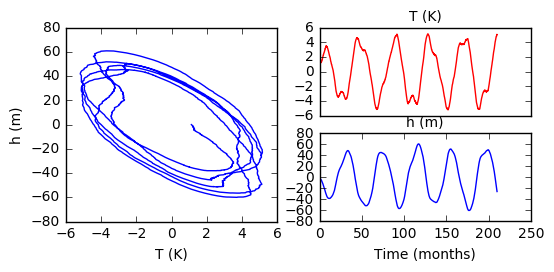

Figure 1:


In [11]:
T,h=rk4(T0=0.15, h0=0., mu0=0.75, n_cycles=5, epsilon=0.1, mu_ann=0.2, f_ann=0.02, f_ran=0.2)
time_and_phase(T,h)
print('Figure 1:')

Figure ? is significantly different from those seen previously due to the minor oscillations embedded within the main oscillations of the time series. Although the trajectory still follows a similar elliptic orbit, there is a lot more variations which occur on both the minor and major axis.

The effects of annual forcing and random forcing have also been examined separately by increasing $f_{ann}$ and $f_{ran}$ independently. The annual forcing acts to adjust the period of the oscillations to be closer to 1 year (rather than 3.4 years). For $f_{ann}=0.02$ this forcing term is not strong enough to alter the frequency but instead changes the shape of the oscillations, so that the peak and troughs in $T$ and $h$ have different magnitudes at different times in the cycle. The random forcing maintains the same phase but adds a random amount of forcing each day, adding a randomness to the trajectory and again altering the magnitude of peaks and troughs.

REMOVE PLOTS BELOW

Annual forcing


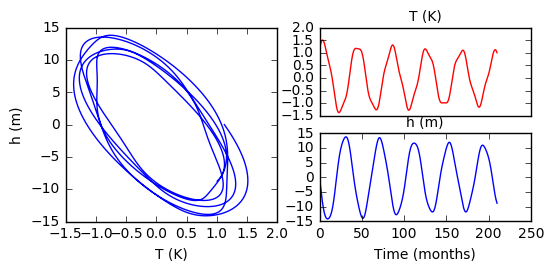

Random


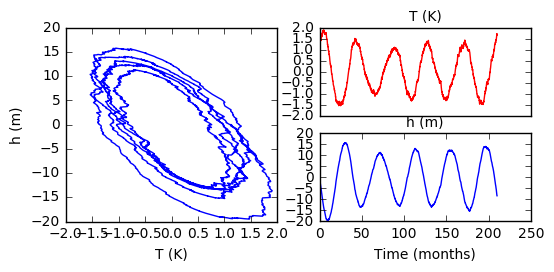

In [12]:
print('Annual forcing')

T,h=rk4(T0=0.15, h0=0., mu0=2/3., n_cycles=5, epsilon=0.1, mu_ann=0.0, f_ann=0.02, f_ran=0.)
time_and_phase(T,h)

print('Random')
T,h=rk4(T0=0.15, h0=0., mu0=2/3., n_cycles=5, epsilon=0.1, mu_ann=0., f_ann=0.0, f_ran=0.2)
time_and_phase(T,h)



Under these settings, a perturbation in SST or thermocline depth is not required in order to see oscillations. When $T_{0}$ and $h_{0}$ are both zero, the windstress forcing is able to perturb the system enough to to initiate ENSO with the same frequency and amplitude as previously. This was not seen under self-excitation where a perturbation in $T$ or $h$ is required to excite the oscillation. 

It is noted that both random and annual forcing terms are able excite the state from $T_0=0,h_0=0$ independently of one another. The annual term initiates a smaller amplitude oscillation with a frequency of 1 year, which then looks like ENSO after 15-20 years. However, the random forcing much more rapidly leads to ENSO with the oscillations becoming apparant after around 7 years, appearing more similar to the overall pattern seen in figure ?. Hence the random forcing term is the main factor in exciting the system into oscillation. This is known as stochastic excitation. CITE JIN

Due to this effect, when $\mu<\frac{2}{3}$, the oscillations are no longer damped out.

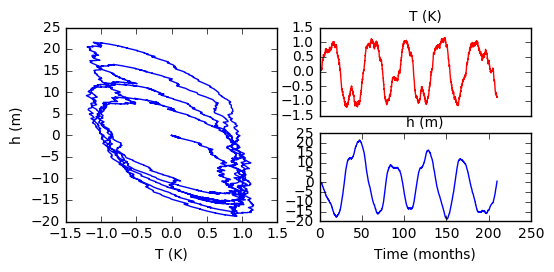

In [13]:
T,h=rk4(T0=0., h0=0., mu0=0.9, n_cycles=5, epsilon=3, mu_ann=0.2, f_ann=0.02, f_ran=0.2)
time_and_phase(T,h)

plt.show()

# Task F

The addition of a random forcing term makes the trajectories irregular and potentially sensitive to the initial conditions. In this section, an ensemble of trajectories are run by perturbing the initial conditions from $T_0=0.15,h_0=0$. Small perturbations ?? are used

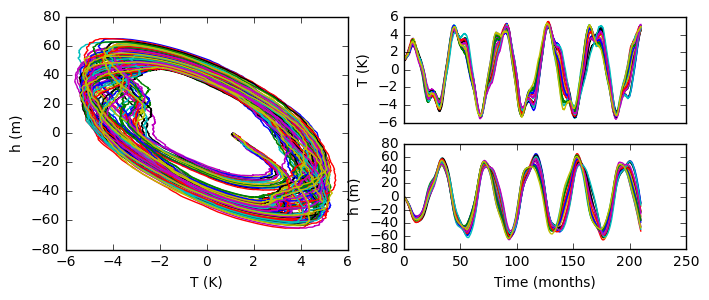

In [14]:
from ensemble import *

ensemble(Tmid=0.15,hmid=0.0,dT=0.001,dh=0.0001,mu0=0.75,n_cycles=5,f_ann=0.02,\
         f_ran=0.2,epsilon=0.1,mu_ann=0.2)

The model is chaotic if it is sensitive to initial conditions. This requires that in phase space, the model is topologically mixing, (any two trajectories which are not initially in contact will at some point intersect each other) and that the periodic points are dense in phase space (the periodic points cover the whole phase space). 

IS THIS SDIC??? Difficult to predict in 10 years+

If sensitive to initial conditions

not chaotic

can you make it chaotic

A model is chaotic if
When the model is chaotic, it has many different perfectly periodic solutions that are, however, unstable and are known as ‘‘unstable periodic orbits’’ (UPOs). Each of these cor- responds to an ENSO cycle with a different period and a different amplitude. We therefore look for UPOs in the chaotic attractor in order to deduce the desired am- plitude–period relation. 

Nonlinear Effects on ENSO’s Period, Eccles and Tziperman 2003

Not chaotic, just a change in amplitude but not in phase, not sensitive to initial conds, so can still predict roughly if the system will be in el nino/ la nina phase but if there is a change in phase it would be chaotic as a small chnage in initial conditions would end up at different point, you couldnt predict it, also cover all of space.



bla

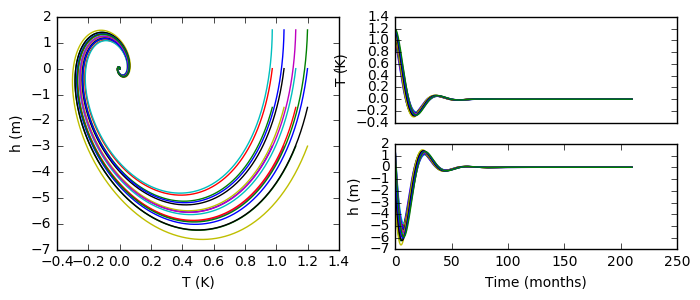

In [15]:
ensemble(Tmid=0.15,hmid=0.0,dT=0.01,dh=0.01,mu0=0.5,n_cycles=5,f_ann=0.0,f_ran=0.,epsilon=0.,mu_ann=0.)



for mu < 2/3. goes to attractor- situation seen before in task B. 

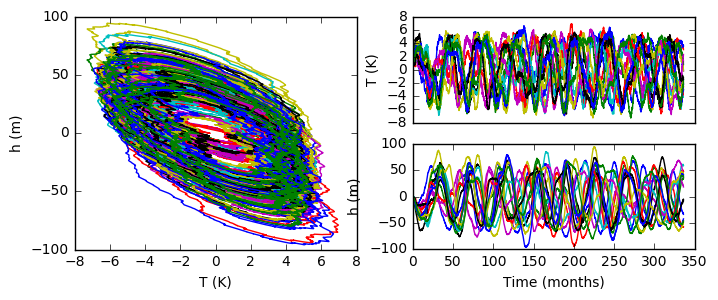

In [16]:
ensemble(Tmid=0.15,hmid=0.0,dT=0.01,dh=0.01,mu0=0.75,n_cycles=8,f_ann=0.1,f_ran=1.0,epsilon=0.1,mu_ann=0.2)



increasing random forcing makes it chaotic- orbits cover all of phase space
what parameters make it chaotic

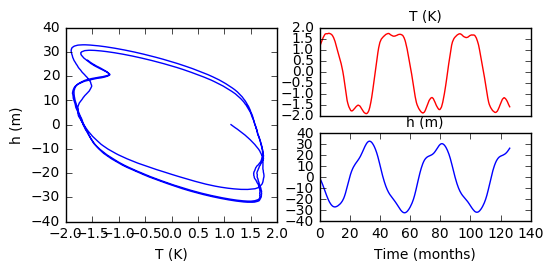

In [17]:
T,h=rk4(T0=0.15, h0=0., mu0=0.9, n_cycles=3, epsilon=1, mu_ann=0.2, f_ann=0.02, f_ran=0.02)
time_and_phase(T,h)

((*- extends 'latex_article.tplx' -*))

((* block bibliography *))
\bibliographystyle{unsrt}
\bibliography{ipython}
((* endblock bibliography *))